In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import math
import random
import warnings
warnings.filterwarnings('ignore')

import keras
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, Activation, LSTM
from keras.engine import input_layer
from keras.models import Sequential
from tensorflow.keras import layers


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
#발전기명, 년월일, 설비용량(MW)	01시	02시	03시	04시	05시	06시	07시	08시	09시	10시	11시	12시	13시	14시	15시	16시	17시	18시	19시	20시	21시	22시	23시	24시

dataset1 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_세종.csv', encoding='cp949')
dataset2 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_안산.csv', encoding='cp949')
dataset3 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_영암.csv', encoding='cp949')

dataset1.head()

,발전기명,년월일,설비용량(MW),1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,24
0,세종시폐기물매립장태양광,2017-01-01,1.628,0,0,0,0,0,0,0,...,742080,334440,87240,2880,4320,0,0,0,0,0
1,세종시폐기물매립장태양광,2017-01-02,1.628,0,0,0,0,0,0,0,...,606360,501120,158280,2760,3360,0,0,0,0,0
2,세종시폐기물매립장태양광,2017-01-03,1.628,0,0,0,0,0,0,0,...,881040,557040,128640,2280,3000,0,0,0,0,0
3,세종시폐기물매립장태양광,2017-01-04,1.628,0,0,0,0,0,0,0,...,677280,502320,112080,1800,2760,0,0,0,0,0
4,세종시폐기물매립장태양광,2017-01-05,1.628,0,0,0,0,0,0,0,...,259560,138840,45000,2520,2880,0,0,0,0,0


### * nan 값 0으로 대체

In [3]:
total_nan_dataset1, total_nan_dataset2, total_nan_dataset3 = dataset1.isnull().sum().sum(), dataset2.isnull().sum().sum(), dataset3.isnull().sum().sum()

print("Before : ", total_nan_dataset1, total_nan_dataset2, total_nan_dataset3)

dataset1, dataset2, dataset3 = dataset1.fillna(0), dataset2.fillna(0), dataset3.fillna(0)
total_nan_dataset1, total_nan_dataset2, total_nan_dataset3 = dataset1.isnull().sum().sum(), dataset2.isnull().sum().sum(), dataset3.isnull().sum().sum()

print("After : ", total_nan_dataset1, total_nan_dataset2, total_nan_dataset3)


Before :  6 5 1
After :  0 0 0


In [4]:
new_dataset1, new_dataset2, new_dataset3 = [], [], []

for i in range(len(dataset1)):
    new_dataset1.extend(dataset1.iloc[i,3:])

for i in range(len(dataset2)):
    new_dataset2.extend(dataset2.iloc[i,3:])

for i in range(len(dataset3)):
    new_dataset3.extend(dataset3.iloc[i,3:])
    
len(new_dataset1), len(new_dataset2), len(new_dataset3)

(40728, 40728, 40728)

In [5]:
df = pd.DataFrame({'local1':new_dataset1,
                   'local2':new_dataset2,
                   'local3':new_dataset3})

In [6]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

train_stats = train_dataset.describe()
#train_stats.pop("local3")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
local1,32582.0,2.508626e+05,3.840852e+05,0.0,0.0,0.0,427530.0,1478520.0
local2,32582.0,2.169418e+05,3.413281e+05,0.0,0.0,1200.0,336000.0,1358400.0
local3,32582.0,2.100543e+06,3.165831e+06,0.0,0.0,28800.0,3504000.0,12384000.0


In [7]:
#레이블
#train_labels = train_dataset.pop('local3')
#test_labels = test_dataset.pop('local3')

train_labels = train_dataset['local3']
test_labels = test_dataset['local3']


def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [8]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
      ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',  optimizer='adam', metrics=['mae', 'mse'])
    return model

In [9]:
model = build_model()

In [10]:
EPOCHS = 500

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=1) #bactch_size

Epoch 1/500
815/815 [==============================] - 1s 1ms/step - loss: 14365670506496.0000 - mae: 2096083.8750 - mse: 14365670506496.0000 - val_loss: 14404757225472.0000 - val_mae: 2096755.3750 - val_mse: 14404757225472.0000
Epoch 2/500
815/815 [==============================] - 1s 952us/step - loss: 13864914649088.0000 - mae: 2059917.6250 - mse: 13864914649088.0000 - val_loss: 13463164289024.0000 - val_mae: 2028795.1250 - val_mse: 13463164289024.0000
Epoch 3/500
815/815 [==============================] - 1s 914us/step - loss: 12435492700160.0000 - mae: 1953346.5000 - mse: 12435492700160.0000 - val_loss: 11517605969920.0000 - val_mae: 1880576.7500 - val_mse: 11517605969920.0000
Epoch 4/500
815/815 [==============================] - 1s 905us/step - loss: 10108017836032.0000 - mae: 1764274.3750 - mse: 10108017836032.0000 - val_loss: 8824045961216.0000 - val_mae: 1651645.8750 - val_mse: 8824045961216.0000
Epoch 5/500
815/815 [==============================] - 1s 925us/step - loss: 726

815/815 [==============================] - 1s 965us/step - loss: 556347.8750 - mae: 424.4805 - mse: 556347.8750 - val_loss: 222464.0000 - val_mae: 343.3987 - val_mse: 222464.0000
Epoch 40/500
815/815 [==============================] - 1s 918us/step - loss: 290044.5625 - mae: 305.6958 - mse: 290044.5625 - val_loss: 137674.5625 - val_mae: 298.5259 - val_mse: 137674.5625
Epoch 41/500
815/815 [==============================] - 1s 962us/step - loss: 155725.7812 - mae: 212.6313 - mse: 155725.7812 - val_loss: 46241.1641 - val_mae: 149.9177 - val_mse: 46241.1641
Epoch 42/500
815/815 [==============================] - 1s 943us/step - loss: 78071.2891 - mae: 125.0751 - mse: 78071.2891 - val_loss: 18628.3027 - val_mae: 69.3794 - val_mse: 18628.3027
Epoch 43/500
815/815 [==============================] - 1s 925us/step - loss: 62668.2695 - mae: 98.8720 - mse: 62668.2695 - val_loss: 31050.8887 - val_mae: 100.0066 - val_mse: 31050.8887
Epoch 44/500
815/815 [==============================] - 1s 911us/

815/815 [==============================] - 1s 922us/step - loss: 4629.3604 - mae: 19.9387 - mse: 4629.3604 - val_loss: 47.1757 - val_mae: 1.5843 - val_mse: 47.1757
Epoch 85/500
815/815 [==============================] - 1s 922us/step - loss: 6591.6562 - mae: 23.2578 - mse: 6591.6562 - val_loss: 74718.5469 - val_mae: 156.4944 - val_mse: 74718.5469
Epoch 86/500
815/815 [==============================] - 1s 946us/step - loss: 37183.6445 - mae: 45.7633 - mse: 37183.6445 - val_loss: 45.8779 - val_mae: 1.3405 - val_mse: 45.8779
Epoch 87/500
815/815 [==============================] - 1s 939us/step - loss: 781.3349 - mae: 7.5789 - mse: 781.3349 - val_loss: 164.0443 - val_mae: 6.9437 - val_mse: 164.0443
Epoch 88/500
815/815 [==============================] - 1s 958us/step - loss: 6775.7695 - mae: 21.9411 - mse: 6775.7695 - val_loss: 68.4947 - val_mae: 3.8611 - val_mse: 68.4947
Epoch 89/500
815/815 [==============================] - 1s 948us/step - loss: 3339.7715 - mae: 18.6068 - mse: 3339.7715

Epoch 130/500
815/815 [==============================] - 1s 949us/step - loss: 120.5892 - mae: 3.7099 - mse: 120.5892 - val_loss: 119.8559 - val_mae: 5.9188 - val_mse: 119.8559
Epoch 131/500
815/815 [==============================] - 1s 901us/step - loss: 4785.2822 - mae: 23.6505 - mse: 4785.2822 - val_loss: 7947.7632 - val_mae: 48.9304 - val_mse: 7947.7632
Epoch 132/500
815/815 [==============================] - 1s 913us/step - loss: 7638.5830 - mae: 24.4520 - mse: 7638.5830 - val_loss: 36454.9883 - val_mae: 106.7118 - val_mse: 36454.9883
Epoch 133/500
815/815 [==============================] - 1s 910us/step - loss: 20170.5840 - mae: 43.4465 - mse: 20170.5840 - val_loss: 41.4819 - val_mae: 2.8544 - val_mse: 41.4819
Epoch 134/500
815/815 [==============================] - 1s 956us/step - loss: 222.8891 - mae: 4.9910 - mse: 222.8891 - val_loss: 131.6472 - val_mae: 6.4978 - val_mse: 131.6472
Epoch 135/500
815/815 [==============================] - 1s 949us/step - loss: 20013.4941 - mae: 

Epoch 176/500
815/815 [==============================] - 1s 906us/step - loss: 117.9501 - mae: 4.3130 - mse: 117.9501 - val_loss: 15.8474 - val_mae: 0.7784 - val_mse: 15.8474
Epoch 177/500
815/815 [==============================] - 1s 917us/step - loss: 46032.2734 - mae: 59.3048 - mse: 46032.2734 - val_loss: 18.7513 - val_mae: 0.7706 - val_mse: 18.7513
Epoch 178/500
815/815 [==============================] - 1s 911us/step - loss: 19.9748 - mae: 1.2196 - mse: 19.9748 - val_loss: 16.8219 - val_mae: 1.1211 - val_mse: 16.8219
Epoch 179/500
815/815 [==============================] - 1s 908us/step - loss: 1051.2333 - mae: 7.7643 - mse: 1051.2333 - val_loss: 2268.8738 - val_mae: 30.8856 - val_mse: 2268.8738
Epoch 180/500
815/815 [==============================] - 1s 910us/step - loss: 5986.4771 - mae: 31.1482 - mse: 5986.4771 - val_loss: 8613.5039 - val_mae: 55.2394 - val_mse: 8613.5039
Epoch 181/500
815/815 [==============================] - 1s 927us/step - loss: 1739.0775 - mae: 14.7627 - m

Epoch 222/500
815/815 [==============================] - 1s 909us/step - loss: 17894.1289 - mae: 30.2615 - mse: 17894.1289 - val_loss: 14.1637 - val_mae: 1.8128 - val_mse: 14.1637
Epoch 223/500
815/815 [==============================] - 1s 985us/step - loss: 14.9071 - mae: 1.3452 - mse: 14.9071 - val_loss: 8.3964 - val_mae: 0.2848 - val_mse: 8.3964
Epoch 224/500
815/815 [==============================] - 1s 919us/step - loss: 46151.6094 - mae: 42.0535 - mse: 46151.6094 - val_loss: 13.4256 - val_mae: 1.4346 - val_mse: 13.4256
Epoch 225/500
815/815 [==============================] - 1s 923us/step - loss: 11.3781 - mae: 0.8937 - mse: 11.3781 - val_loss: 10.4477 - val_mae: 1.1286 - val_mse: 10.4477
Epoch 226/500
815/815 [==============================] - 1s 925us/step - loss: 71.7443 - mae: 3.1859 - mse: 71.7443 - val_loss: 68.4073 - val_mae: 4.4798 - val_mse: 68.4073
Epoch 227/500
815/815 [==============================] - 1s 926us/step - loss: 40712.9297 - mae: 40.8670 - mse: 40712.9297 

815/815 [==============================] - 1s 961us/step - loss: 6942.3887 - mae: 25.6514 - mse: 6942.3887 - val_loss: 99870.9844 - val_mae: 177.9173 - val_mse: 99870.9844
Epoch 269/500
815/815 [==============================] - 1s 941us/step - loss: 5571.0132 - mae: 23.0632 - mse: 5571.0132 - val_loss: 2176.1431 - val_mae: 25.6490 - val_mse: 2176.1431
Epoch 270/500
815/815 [==============================] - 1s 955us/step - loss: 13755.5303 - mae: 24.4020 - mse: 13755.5303 - val_loss: 53.1792 - val_mae: 3.8878 - val_mse: 53.1792
Epoch 271/500
815/815 [==============================] - 1s 948us/step - loss: 4189.4868 - mae: 17.1447 - mse: 4189.4868 - val_loss: 97.9846 - val_mae: 5.2196 - val_mse: 97.9846
Epoch 272/500
815/815 [==============================] - 1s 921us/step - loss: 10953.3701 - mae: 22.9713 - mse: 10953.3701 - val_loss: 8.5573 - val_mae: 1.1679 - val_mse: 8.5573
Epoch 273/500
815/815 [==============================] - 1s 920us/step - loss: 18300.0332 - mae: 27.7707 - ms

815/815 [==============================] - 1s 1ms/step - loss: 10057.1562 - mae: 21.5854 - mse: 10057.1562 - val_loss: 4.7160 - val_mae: 0.7040 - val_mse: 4.7160
Epoch 315/500
815/815 [==============================] - 1s 1ms/step - loss: 1331.1936 - mae: 11.8957 - mse: 1331.1936 - val_loss: 82.5357 - val_mae: 5.1344 - val_mse: 82.5357
Epoch 316/500
815/815 [==============================] - 1s 1ms/step - loss: 11594.1055 - mae: 25.6885 - mse: 11594.1055 - val_loss: 3.3685 - val_mae: 0.3080 - val_mse: 3.3685
Epoch 317/500
815/815 [==============================] - 1s 985us/step - loss: 6269.1904 - mae: 10.2587 - mse: 6269.1904 - val_loss: 24531.4023 - val_mae: 100.7230 - val_mse: 24531.4023
Epoch 318/500
815/815 [==============================] - 1s 985us/step - loss: 15262.5811 - mae: 21.8251 - mse: 15262.5811 - val_loss: 23.7748 - val_mae: 2.8449 - val_mse: 23.7748
Epoch 319/500
815/815 [==============================] - 1s 1ms/step - loss: 12885.3857 - mae: 17.0018 - mse: 12885.3857

815/815 [==============================] - 1s 992us/step - loss: 27821.6836 - mae: 35.3456 - mse: 27821.6836 - val_loss: 5.8853 - val_mae: 1.2013 - val_mse: 5.8853
Epoch 361/500
815/815 [==============================] - 1s 1ms/step - loss: 6.0901 - mae: 0.9235 - mse: 6.0901 - val_loss: 2.6651 - val_mae: 0.3546 - val_mse: 2.6651
Epoch 362/500
815/815 [==============================] - 1s 992us/step - loss: 9140.1924 - mae: 21.8678 - mse: 9140.1924 - val_loss: 3.3276 - val_mae: 0.7251 - val_mse: 3.3276
Epoch 363/500
815/815 [==============================] - 1s 941us/step - loss: 423.6466 - mae: 5.2058 - mse: 423.6466 - val_loss: 110.0354 - val_mae: 5.8538 - val_mse: 110.0354
Epoch 364/500
815/815 [==============================] - 1s 1ms/step - loss: 8829.0010 - mae: 19.5447 - mse: 8829.0010 - val_loss: 11.2926 - val_mae: 2.0177 - val_mse: 11.2926
Epoch 365/500
815/815 [==============================] - 1s 984us/step - loss: 7758.5400 - mae: 21.7154 - mse: 7758.5400 - val_loss: 3.0842 

815/815 [==============================] - 1s 1ms/step - loss: 10361.9053 - mae: 20.0318 - mse: 10361.9053 - val_loss: 42.4613 - val_mae: 3.5423 - val_mse: 42.4613
Epoch 407/500
815/815 [==============================] - 1s 995us/step - loss: 51946.2188 - mae: 49.7509 - mse: 51946.2188 - val_loss: 2.4479 - val_mae: 0.5636 - val_mse: 2.4479
Epoch 408/500
815/815 [==============================] - 1s 1ms/step - loss: 3.1535 - mae: 0.6067 - mse: 3.1535 - val_loss: 2.3087 - val_mae: 0.4959 - val_mse: 2.3087
Epoch 409/500
815/815 [==============================] - 1s 992us/step - loss: 2821.3914 - mae: 16.1953 - mse: 2821.3914 - val_loss: 19256.7754 - val_mae: 75.3647 - val_mse: 19256.7754
Epoch 410/500
815/815 [==============================] - 1s 983us/step - loss: 2842.0811 - mae: 13.7837 - mse: 2842.0811 - val_loss: 1026.5002 - val_mae: 17.6798 - val_mse: 1026.5002
Epoch 411/500
815/815 [==============================] - 1s 1ms/step - loss: 9168.6230 - mae: 40.3839 - mse: 9168.6230 - va

815/815 [==============================] - 1s 965us/step - loss: 6.1918 - mae: 0.9325 - mse: 6.1918 - val_loss: 6.3962 - val_mae: 1.1309 - val_mse: 6.3962
Epoch 453/500
815/815 [==============================] - 1s 1ms/step - loss: 16776.8555 - mae: 32.0433 - mse: 16776.8555 - val_loss: 22.6428 - val_mae: 2.6176 - val_mse: 22.6428
Epoch 454/500
815/815 [==============================] - 1s 981us/step - loss: 880.5861 - mae: 5.9036 - mse: 880.5861 - val_loss: 200.4028 - val_mae: 7.6417 - val_mse: 200.4028
Epoch 455/500
815/815 [==============================] - 1s 967us/step - loss: 11847.4727 - mae: 34.5218 - mse: 11847.4727 - val_loss: 23.3217 - val_mae: 2.6108 - val_mse: 23.3217
Epoch 456/500
815/815 [==============================] - 1s 1ms/step - loss: 5494.5356 - mae: 26.3867 - mse: 5494.5356 - val_loss: 231.0454 - val_mae: 9.4937 - val_mse: 231.0454
Epoch 457/500
815/815 [==============================] - 1s 985us/step - loss: 12340.0654 - mae: 20.8575 - mse: 12340.0654 - val_los

Epoch 499/500
815/815 [==============================] - 1s 1ms/step - loss: 123.1192 - mae: 2.8320 - mse: 123.1192 - val_loss: 53.9092 - val_mae: 4.0238 - val_mse: 53.9092
Epoch 500/500
815/815 [==============================] - 1s 996us/step - loss: 20291.7246 - mae: 27.5959 - mse: 20291.7246 - val_loss: 2.1395 - val_mae: 0.4400 - val_mse: 2.1395


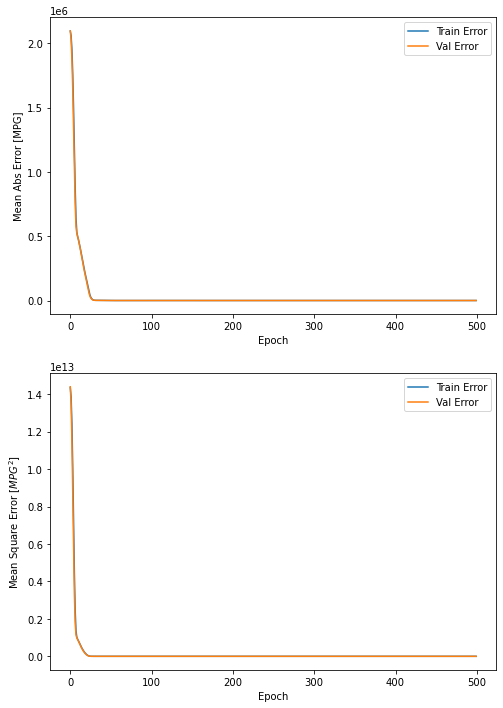

In [11]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    #plt.ylim([0,5])
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    #plt.ylim([0,20])
    plt.legend()
    plt.show()

plot_history(history)

In [12]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} local1".format(mae))

255/255 - 0s - loss: 3.8372 - mae: 0.4556 - mse: 3.8372 - 162ms/epoch - 635us/step
테스트 세트의 평균 절대 오차:  0.46 local1
